# MeerKAT Commensal Survey Figures of Merit

The parameter space for SETI signals is massive. To quantify how much of this parameter space SETI searches over the past ~50 years have traversed, ETI researchers use.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import matplotlib as mpl
import astropy
import pandas as pd
from scipy.stats import linregress

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

## Useful Quantities/Functions

In [2]:
def SEFD(ants = 64, eff = 0.8, D = 13.8, T_sys = 30.):
    """System Equivalent Flux Density of a radio telescope
    """
    return (2.0 * const.k_B * (T_sys * u.K) / (A_eff(ants, eff, D))).to(u.Jy)

def sensitivity(ants = 64, eff = 0.8, D = 13.8, T_sys = 30.):
    return A_eff(ants, eff, D) / (T_sys * u.K)

def A_eff(ants = 64, eff = 0.8, D = 13.8):
    """Calculates the effective area of an antenna
    
    http://www.kat.ac.za/Bursars_Conferences/Nov2011/23%20Nov-Wednesday/Session%206/2_Bradley_Frank.pdf
    http://accelconf.web.cern.ch/AccelConf/icalepcs2017/papers/thpha066.pdf
    
    D: float
        Antenna diameter
    eff: float
        Antenna efficiency
    ants: int
        Number of antennas
        
    """
    return np.pi / 4.0 * (D * u.meter) ** 2 * eff * ants

def Omega(ra1, ra2, dec1, dec2):
    """
    right ascension and declination given in radians
    
    https://physics.stackexchange.com/questions/171023/calculating-the-area-of-region-of-the-sky
    """
    return (ra2 - ra1) * (np.sin(dec2) - np.sin(dec1)) * (u.radian ** 2)

def S_min(sefd, snr, dv, n_pol, t_obs, dv_t = 1.0):
    return snr * (sefd / (dv_t * u.Hz)) * np.sqrt((dv * u.Hz) / (n_pol * (t_obs * u.second)))

In [3]:
GBT = {
    'ants': 1,
    'eff': 0.72,
    'D': 100,
    'T_sys': 20
}

mk = {
    'ants': 64,
    'eff': 0.8,
    'D': 13.5,
    'T_sys': 30
}

These values can be used to computed the SEFD of Green Bank and compare them to values found in (Enriquez et. al 2017)

In [4]:
SEFD(**GBT)

<Quantity 9.76609052 Jy>

## Figures of Merit

The 

### Survey Speed Figure of Merit (SSFM)

$$\textrm{SSFM} \propto \frac{\Delta \nu_{\textrm{inst}}}{\textrm{SEFD}^2 \delta \nu}$$

In [5]:
def SSFM(sefd, inst_band, chan_band):
    """Survey Speed Figure of Merit
    """
    if type(sefd) is not u.quantity.Quantity:
        sefd *= u.Jy
    return (inst_band * u.MHz) / ((chan_band * u.Hz) * (sefd) ** 2)

### Drake Figure of Merit (DFM)

$$ \textrm{DFM} = \frac{\Delta \nu_{\textrm{tot}} \Omega}{\textrm{S}_{\textrm{min}} \textrm{}^{3/2}}$$

In [6]:
def DFM(S_min, tot_band, omega):
    """asdf
    """
    if type(S_min) is not u.quantity.Quantity:
        S_min *= u.Jy
    if type(omega) is not u.quantity.Quantity:
        omega *= u.deg**2
    return (tot_band * u.MHz) * (omega) / (S_min ** (3.0/2.0))


### Continuous Waveform Transmitter Rate

$$\textrm{CWTFM} = \zeta_{\textrm{AO}} \frac{\textrm{EIRP}}{N_{stars} \nu_{\textrm{rel}}}$$

In [7]:
def CWMTF(zeta_ao, eirp, N_stars, nu_rel):
    return zeta_ao * eirp / (N_stars * nu_rel)

## Recreate Emilio's Plots and Add MeerKAT

### Figure 6

#### Survey Values

In [8]:
labels = ['Price', 'Enriquez', 'Gray', 'Harp', 'Siemion', 'Phoenix',
          'Horowitz', 'Valdes', 'Tarter', 'Verschuur']
years = [2019, 2018, 2017, 2016, 2013, 1998, 
         1993, 1986, 1980, 1973]

values = [
    {
        'SSFM': {
            'sefd': 10,
            'inst_band': 800, 
            'chan_band': 3
        },
        'DFM':{
            'S_min': 17,
            'tot_band': 660,
            'omega': 10.6
        }
    },
    {
        'SSFM': {
            'sefd': 18,
            'inst_band': 1, 
            'chan_band': 122
        },
        'DFM':{
            'S_min': 28,
            'tot_band': 1,
            'omega': 22.7
        }
    },
    {
        'SSFM': {
            'sefd': 664,
            'inst_band': 70, 
            'chan_band': 0.7
        },
        'DFM':{
            'S_min': 378,
            'tot_band': 400,
            'omega': 193
        }
    },
    {
        'SSFM': {
            'sefd': 10,
            'inst_band': 670, 
            'chan_band': 1
        },
        'DFM':{
            'S_min': 10,
            'tot_band': 670,
            'omega': 1.3
        }
    },
    {
        'SSFM': {
            'sefd': 190,
            'inst_band': 20, 
            'chan_band': 1
        },
        'DFM':{
            'S_min': 332,
            'tot_band': 5000,
            'omega': 18
        }
    },
    {
        'SSFM': {
            'sefd': 884,
            'inst_band': 0.4,
            'chan_band': 0.05
        },
        'DFM':{
            'S_min': 18755,
            'tot_band': 1.2,
            'omega': 28052
        }
    },
    {
        'SSFM': {
            'sefd': 1040,
            'inst_band': 1.25, 
            'chan_band': 4883
        },
        'DFM':{
            'S_min': 3980,
            'tot_band': 1.25,
            'omega': 14.7
        }
    },
    {
        'SSFM': {
            'sefd': 51,
            'inst_band': 0.36, 
            'chan_band': 5.5
        },
        'DFM':{
            'S_min': 150,
            'tot_band': 1.4,
            'omega': 3.0
        }
    },
    {
        'SSFM': {
            'sefd': 62,
            'inst_band': 0.6, 
            'chan_band': 490
        },
        'DFM':{
            'S_min': 187,
            'tot_band': 0.6,
            'omega': 1.6
        }
    }
]

In [9]:
key_list = ['SSFM', 'DFM']

ssfm = []
dfm = []

for value in values:
    for k in key_list:
        if k == 'SSFM':
            ssfm.append(SSFM(**value[k]).to(u.Jy ** -2).value)
        if k == 'DFM':
            dfm.append(DFM(**value[k]).value)
            
ssfm = np.array(ssfm)
dfm = np.array(dfm)

#### Price et al. 2019 Survey Params

In [10]:
price_sefd = np.array([10, 10, 34]) # sefd gbt, gbt, parkes
tot_band = np.array([800., 1000., 850]) # Bandwidth in Megahertz
snr = 10.
t_obs = 300 # seconds

# Fix this so that it reflects real values!

omega = np.array([9.3, 9.3, 3.5]) # sky coverage

In [11]:
# SSFM
price_ssfm = np.sum(SSFM(price_sefd, tot_band, 3.0).to(u.Jy ** -2)).value

# DFM
price_s_min = (snr * (price_sefd * u.Jy) / (1.0 * u.Hz) * np.sqrt(3.0 * u.Hz / (2.0 * t_obs * u.second))).to(u.Jy)
price_dfm = np.sum((omega * tot_band) / (price_s_min ** (3.0/2.0)).value)

ssfm = np.insert(ssfm, 0, price_ssfm)
dfm = np.insert(dfm, 0, price_dfm)

#### MeerKAT Survey Params

In [12]:
# MeerKAT Estimates
# https://breakthroughinitiatives.org/news/23

# SEFD 
ants = 64
eff = 0.8
D = 13.5
T_sys = 30
sefd_mk = SEFD(ants=ants, eff=eff, D=D, T_sys=T_sys)

# SSFM
inst_band_mk = 660
chan_band_mk = 1
ssfm_mk = SSFM(sefd_mk, inst_band_mk, chan_band_mk).to(u.Jy ** -2)

# DFM
coord_list = np.deg2rad([0, 360, -90, 40])
omega = Omega(*coord_list).to(u.deg ** 2)
n_pol = 2 # polarizations
t_obs = 300  # observation time
SNR = 10
s_min_mk = S_min(sefd=sefd_mk, snr=SNR, dv=chan_band_mk, n_pol=n_pol, t_obs=t_obs)
dfm_mk = DFM(s_min_mk, inst_band_mk, omega)


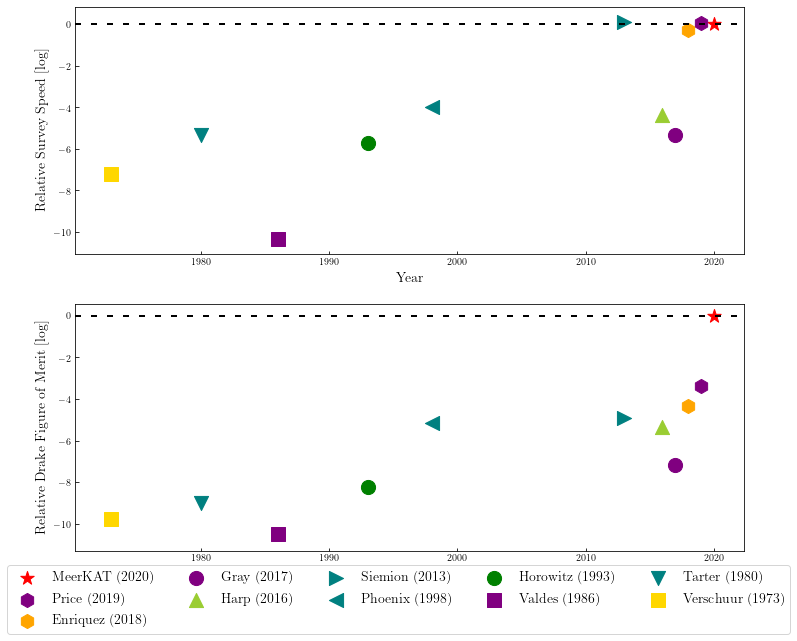

In [13]:
markers = ["h", "h", "o", "^", ">", "<", "o", "s", "v", 's']
colors = ["purple", 'orange','purple','yellowgreen', 'teal',
          'teal', 'green', 'purple', 'teal', 'gold']



fig, ax = plt.subplots(2, 1, figsize=(12,10))
ax = ax.ravel()

ax[0].scatter(2020, 0, marker = '*', color = 'red', s = 200)    
ax[1].scatter(2020, 0, marker = '*', color = 'red', s = 200,
              label='MeerKAT (2020)')

for i in np.arange(len(years)):
    ax[0].scatter(years[i], np.log10(ssfm[i] / ssfm_mk.value), 
                  marker = markers[i], color = colors[i], s=200)
    ax[1].scatter(years[i], np.log10(dfm[i] / dfm_mk.value), 
                  marker = markers[i], color = colors[i], s=200, 
                  label='{} ({})'.format(labels[i], years[i]))
    
ax[0].axhline(0, color='k', linestyle='--', dashes=(3, 5), linewidth=2)
ax[1].axhline(0, color='k', linestyle='--', dashes=(3, 5), linewidth=2)
ax[0].set_xlabel('Year', fontsize=14)
ax[0].set_ylabel('Relative Survey Speed [log]', fontsize=14)
ax[1].set_ylabel('Relative Drake Figure of Merit [log]', fontsize=14)
handles, l = ax[1].get_legend_handles_labels()
fig.legend(handles, l, loc='lower center', ncol = 5, fontsize=14)
plt.show()
#plt.savefig('figure_6_emilio_w_MeerKAT.png', dpi=200)

In [100]:
labels[0]

'Enriquez'

It is important to note

### Figure 7

In [14]:
N_stars = np.array([692, 1e12, 65, 86, 290, 1e7, 53, 201, 3])
nu_rel = np.array([660. / 1500., 1.0 / 1400., 8000./ 5000., 670./1500., 370./1500.,
                   1.2 / 1420., 1.25 / 1516.7, 1.4 / 1666.4, 0.6 / 1426.])
EIRP = np.array([5.2e12, 1.95e21, 8.8e16, 1.4e15, 8.8e13, 1.1e18, 1.8e13, 1.1e13, 5.6e11])

markers = ["h", "o", "^", ">", "<", "o", "s", "v", 's']
colors = ['orange','purple','yellowgreen', 'teal',
          'teal', 'green', 'purple', 'teal', 'gold']

labels = ['Enriquez', 'Gray', 'Harp', 'Siemion', 'Phoenix',
          'Horowitz', 'Valdes', 'Tarter', 'Verschuur']
years = [2018, 2017, 2016, 2013, 1998, 
         1993, 1986, 1980, 1973]

In [15]:
def eirp(s_min, dist = 4.35529e3):
    """
    Parameters:
    dist: (float)
        Distance in parsecs
        
    """
    return 4 * np.pi * (dist * u.parsec).to(u.meter) ** 2 * s_min.to(u.W * u.meter ** -2 * u.Hz ** -1) * u.Hz

In [16]:
# MeerKAT values
mk_stars = 1e6
mk_nu_rel = 660 / 1500.
eirp_mk = eirp(S_min(sefd=sefd_mk, snr=SNR, dv=chan_band_mk, n_pol=n_pol, t_obs=t_obs)).value

# Price values
eirp_price = np.array([2.1e12, 9.1e12])
stars_price = np.array([1000, 189])
nu_rel_price = np.array([1000.0 / 2300., 800/3000.])

In [17]:
S_min(sefd=sefd_mk, snr=SNR, dv=chan_band_mk, n_pol=n_pol, t_obs=t_obs)

<Quantity 4.61457148 Jy / (Hz(1/2) s(1/2))>

In [18]:
eirp(S_min(sefd=sefd_mk, snr=SNR, dv=chan_band_mk, n_pol=n_pol, t_obs=t_obs))

<Quantity 1.04731299e+16 W>

In [19]:
m, b, _, _, _ = linregress([np.log10(eirp_mk), np.log10(EIRP[1]), np.log10(eirp_price[0])],
                           [np.log10(1.0 / (mk_stars * mk_nu_rel)), 
                            np.log10(1.0 / (N_stars[1] * nu_rel[1])), 
                            np.log10(1.0 / (1700 * 800. / 1500.))])

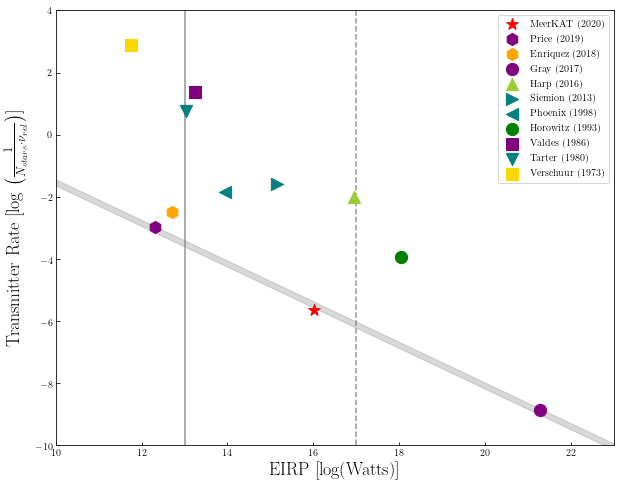

In [20]:
plt.figure(figsize=(10,8))

plt.scatter(np.log10(eirp_mk), np.log10(1.0 / (mk_stars * mk_nu_rel)),
            marker = '*', color = 'red', s = 150, label = 'MeerKAT (2020)')

plt.scatter(np.log10(eirp_price[0]), np.log10(1.0 / (1700 * 800. / 1500.)),
            marker = 'h', color = 'purple', s = 150, label = 'Price (2019)')

plt.axvline(17, color='grey', linestyle='--', alpha = 0.85, zorder=0)
plt.axvline(13, color='grey', alpha = 0.85, zorder=0)

for i in np.arange(len(markers)):
    plt.scatter(np.log10(EIRP[i]), np.log10(1.0 / (N_stars[i] * nu_rel[i])),
                marker = markers[i], color = colors[i], s=150, 
                label='{} ({})'.format(labels[i], years[i]))


plt.fill_between(np.linspace(9, 23, 100), m * np.linspace(9, 23, 100) + b - 0.1,
                 m * np.linspace(9, 23, 100) + b + 0.1, alpha = 0.3, zorder=0, color='grey')

plt.xlim([10, 23])
plt.ylim([-10, 4])
plt.legend()
plt.xlabel('EIRP [log(Watts)]', fontsize=18)
plt.ylabel(r'Transmitter Rate [log $ \bigg(\frac{1}{N_{stars} \cdot \nu_{rel}} \bigg)$]', fontsize=18)
#plt.savefig('figure_5_w_meerkat.png', dpi=200)
plt.show()

## EIRP Calculations

In [42]:
targets = pd.read_csv('https://www.dropbox.com/s/yklypkckc6m2xx1/1_million_sample_complete.csv?dl=1')
targets = targets.loc[:, ['dist.c']]

In [355]:
# SEFD MK
ants = 64
eff = 0.8
D = 13.5
T_sys = 30

# S_min
SNR = 15.
chan_band_mk = 1.
n_pol = 2
t_obs = 300.

sefd_mk = SEFD(ants = ants, eff = eff, D = D, T_sys = T_sys)
S_min_mk = S_min(sefd=sefd_mk, snr=SNR, dv=chan_band_mk, n_pol=n_pol, t_obs=t_obs, dv_t= 1.)

ants = np.array([10, 30, 50])
sefd_mk = SEFD(ants = ants, eff = eff, D = D, T_sys = T_sys)
S_min_mk = S_min(sefd=sefd_mk, snr=SNR, dv=chan_band_mk, n_pol=n_pol, t_obs=t_obs)

In [382]:
def plot_hist(x, bins = 50):
    counts, bins = np.histogram(x, bins = bins)
    width = .8 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    return (center, counts, width)

def log_plot_hist(x, bins = 50):
    counts, bins = np.histogram(x, bins = np.logspace(np.log10(min_dist), np.log10(max_dist), bins).ravel())
    width = 0.75 * np.diff(bins)
    center = (bins[:-1] + bins[1:]) / 2
    return (center, counts, width)

def log_sudo_cdf(x, bins = 50):
    counts, bins = np.histogram(x, bins = np.logspace(np.log10(eirp_mk.min()), np.log10(eirp_mk.max()), bins).ravel())
    return bins, np.cumsum(counts)

def sudo_cdf(x, bins = 50):
    counts, bins = np.histogram(x, bins = bins)
    return bins, np.cumsum(counts)

Plot below was to estimate the number sources that we could potentially see high powered radar on. May just end up plotting EIRP vs. Sources (cdf)

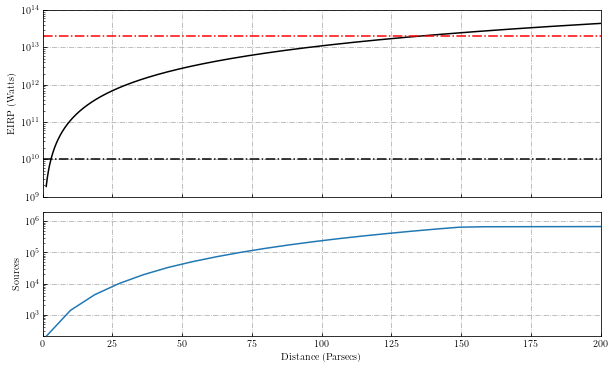

In [357]:
min_dist = targets.dropna(axis=0).min()
max_dist = targets.dropna(axis=0).max()
dist = np.linspace(min_dist, 200, 1000)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (10,6), sharex = True, gridspec_kw={'height_ratios': [3, 2]})
ax0.plot(dist, eirp(S_min_mk, dist = dist).ravel() / 0.75, 'k')
ax0.grid(linestyle='dashdot', zorder=0)
ax0.axhline(y = 2e13, color = 'red', linestyle='-.')
ax0.axhline(y = 1e10, color = 'black', linestyle = '-.')
#ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylim([1e9, 1e14])
ax0.set_ylabel('EIRP (Watts)')

# Histogram
#center, counts, width = log_plot_hist(targets.dropna(axis=0), bins = 30)
#ax1.bar(center, counts, align = 'center', width = width, edgecolor = 'k', color = 'blue')

bins, values = sudo_cdf(targets.dropna(axis=0), bins = 500)
plt.plot(bins[:-1], values)
ax1.set_yscale('log')
ax1.grid(linestyle='dashdot', zorder=0)
ax1.set_ylabel('Sources')
ax1.set_ylim([0, 2e6])
plt.xlabel('Distance (Parsecs)')

plt.xlim([0, 200])
plt.subplots_adjust(hspace = 0.1)
plt.show()

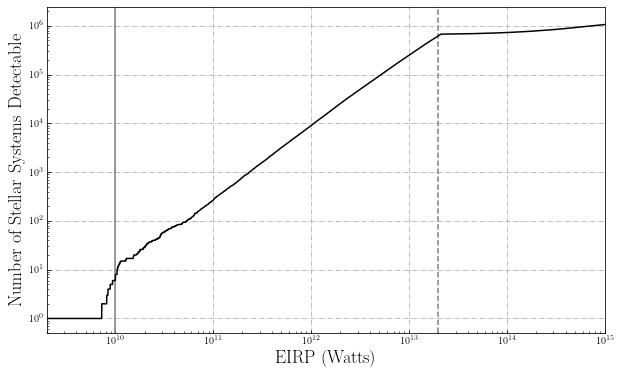

In [361]:
eirp_mk = eirp(S_min_mk, dist = targets.dropna(axis=0).values).ravel().value
x, y = log_sudo_cdf(eirp_mk, bins = 5000)
plt.figure(figsize=(10,6))
plt.axvline(x = 2e13, color = 'grey', linestyle = '--')
plt.axvline(x = 1e10, color = 'grey', linestyle = '-')
plt.plot(x[:-1], y, 'k')
plt.grid(linestyle='dashdot', zorder=0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('EIRP (Watts)', fontsize=18)
plt.ylabel('Number of Stellar Systems Detectable', fontsize=18)
plt.xlim([2e9, 1e15])
plt.show()

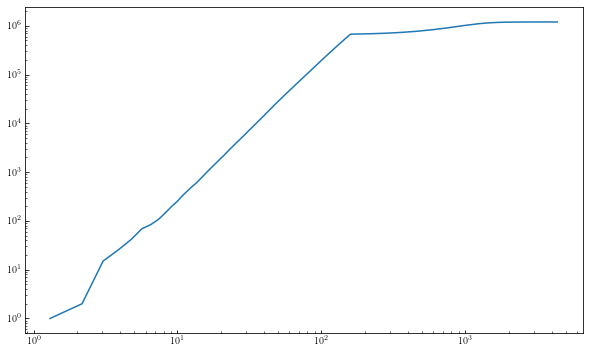

In [375]:
bins, values = sudo_cdf(targets.dropna(axis=0).values, 5000)
plt.figure(figsize=(10,6))
plt.plot(bins[:-1], values)
plt.xscale('log')
plt.yscale('log')

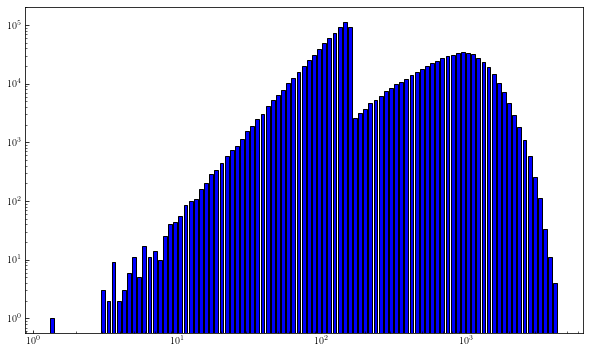

In [384]:
center, counts, width = log_plot_hist(targets.dropna(axis=0).values, 100)
plt.figure(figsize=(10,6))
plt.bar(center, counts, align = 'center', width = width, edgecolor = 'k', color = 'blue')
plt.xscale('log')
plt.yscale('log')

In [314]:
S_min_mk

<Quantity [44.2998862 , 14.76662873,  8.85997724] Jy / (Hz(1/2) s(1/2))>

In [362]:
p_radar = np.where(eirp(S_min_mk, dist = targets.dropna(axis=0)['dist.c'].values).ravel().value < 2e13)[0].shape[0]
air_radar = np.where(eirp(S_min_mk, dist = targets.dropna(axis=0)['dist.c'].values).ravel().value < 1e10)[0].shape[0]

In [364]:
air_radar

6